In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

In [66]:
df = pd.read_csv('Aemf1.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

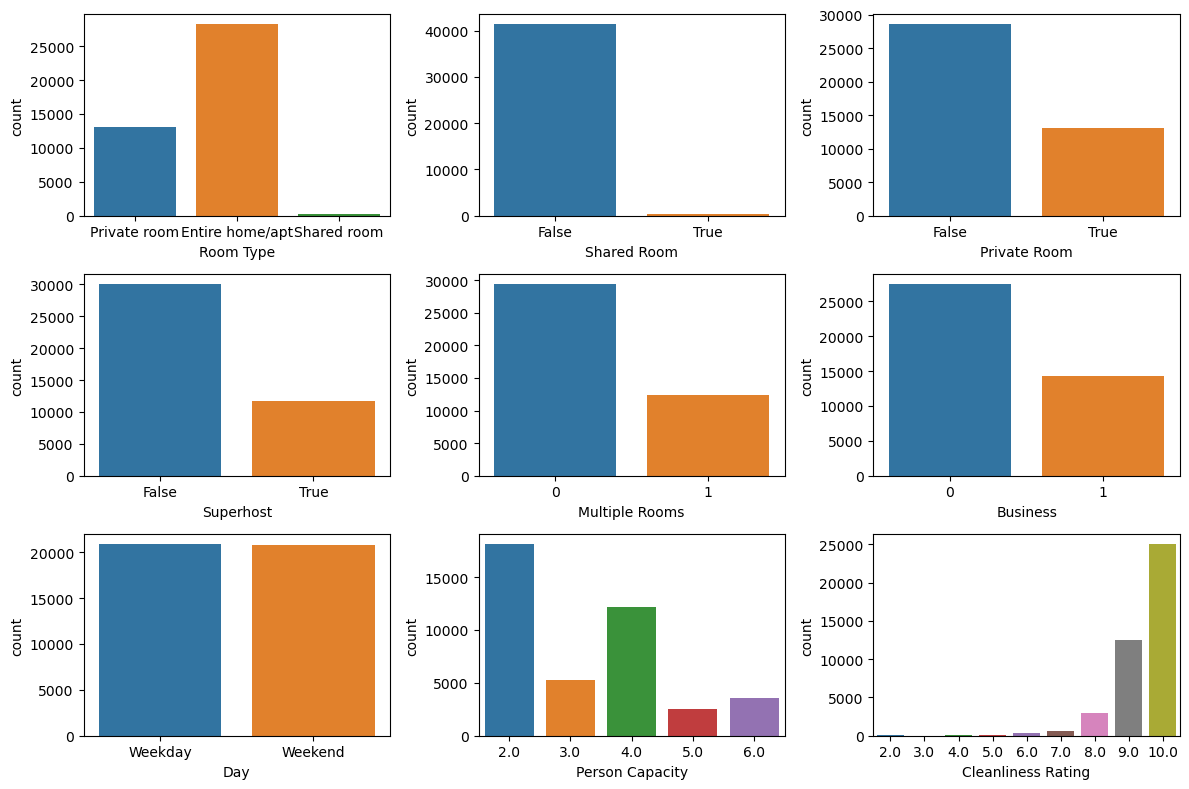

In [68]:
k = ['Room Type','Shared Room','Private Room','Superhost','Multiple Rooms','Business','Day','Person Capacity','Cleanliness Rating']
fig, ax = plt.subplots(3, 3,figsize=(12,8),dpi=100,sharey=False)
plt.xticks(rotation='horizontal')
sns.countplot(data=df,x=k[0], ax=ax[0][0])
sns.countplot(data=df,x=k[1], ax=ax[0][1])
sns.countplot(data=df,x=k[2], ax=ax[0][2])
sns.countplot(data=df,x=k[3], ax=ax[1][0])
sns.countplot(data=df,x=k[4], ax=ax[1][1])
sns.countplot(data=df,x=k[5], ax=ax[1][2])
sns.countplot(data=df,x=k[6], ax=ax[2][0])
sns.countplot(data=df,x=k[7], ax=ax[2][1])
sns.countplot(data=df,x=k[8], ax=ax[2][2])
plt.tight_layout()
plt.show()

In [69]:
df.rename(columns={'Day':'Weekend'},inplace=True)

In [70]:
df['Entire home/apt'] = np.where(df['Room Type']=='Entire home/apt',1,0)

In [71]:
df

,City,Price,Weekend,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Entire home/apt
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,0
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,0
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,1
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,1
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,1
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0


In [72]:
df['Superhost'] = df['Superhost'].map({True:1,False:0})
df['Shared Room'] = df['Shared Room'].map({True:1,False:0})
df['Private Room'] = df['Private Room'].map({True:1,False:0})
df['Weekend'] = df['Weekend'].map({'Weekend':1,'Weekday':0})
df

,City,Price,Weekend,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Entire home/apt
0,Amsterdam,194.033698,0,Private room,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0
1,Amsterdam,344.245776,0,Private room,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,0
2,Amsterdam,264.101422,0,Private room,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,0
3,Amsterdam,433.529398,0,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0
4,Amsterdam,485.552926,0,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,1,Entire home/apt,0,0,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,1
41710,Vienna,304.793960,1,Entire home/apt,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,1
41711,Vienna,637.168969,1,Entire home/apt,0,0,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,1
41712,Vienna,301.054157,1,Private room,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,0


In [73]:
dfn = df.copy()
dfn.drop(['Room Type','Normalised Restraunt Index','Normalised Attraction Index'],axis=1,inplace=True)
dfn.head()

,City,Price,Weekend,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,Entire home/apt
0,Amsterdam,194.033698,0,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,0
1,Amsterdam,344.245776,0,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,0
2,Amsterdam,264.101422,0,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,0
3,Amsterdam,433.529398,0,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,0
4,Amsterdam,485.552926,0,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,0


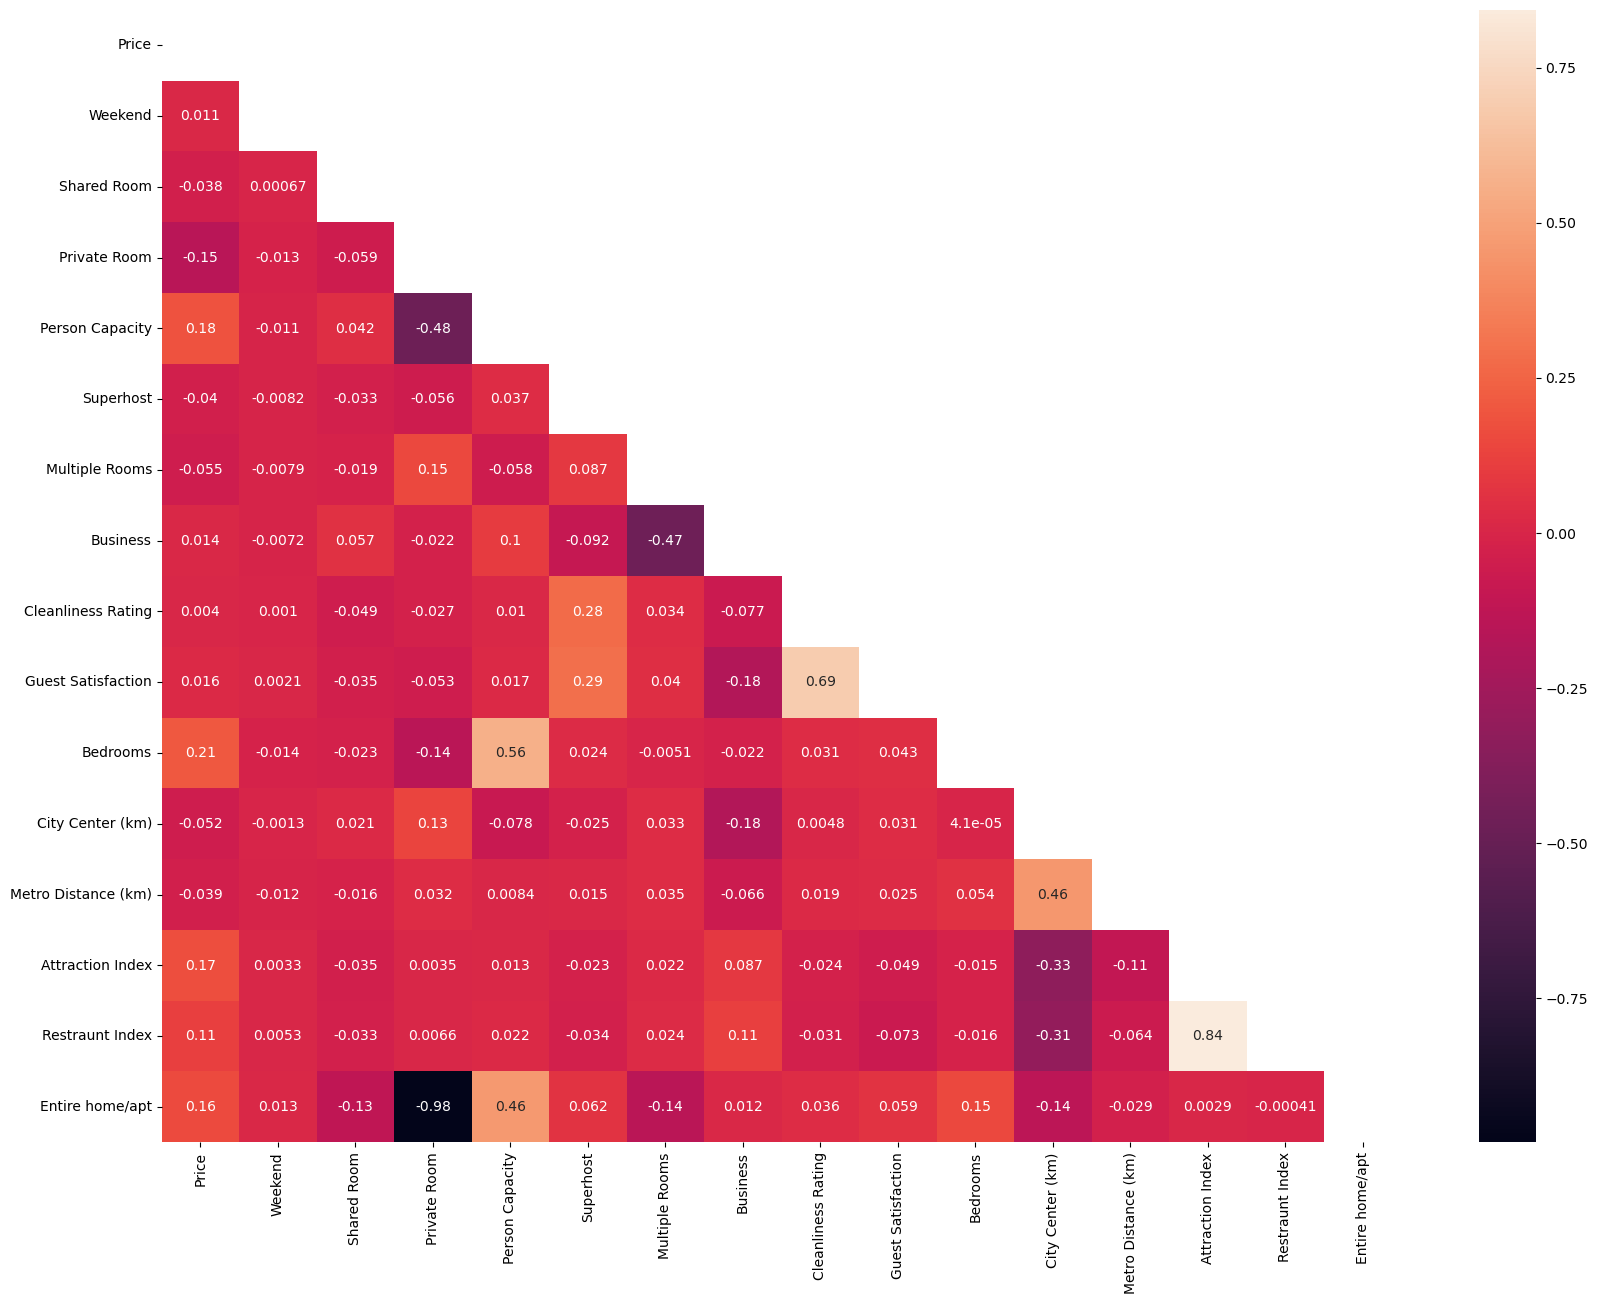

In [74]:
plt.figure(figsize=(20,15),dpi=100)
mask = np.triu(np.ones_like(dfn.corr()))
sns.heatmap(dfn.corr(),annot=True,mask=mask)
plt.show()

In [75]:
dfn.head()

,City,Price,Weekend,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,Entire home/apt
0,Amsterdam,194.033698,0,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,0
1,Amsterdam,344.245776,0,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,0
2,Amsterdam,264.101422,0,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,0
3,Amsterdam,433.529398,0,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,0
4,Amsterdam,485.552926,0,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,0


In [76]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
Weekend,41714.0,0.499305,0.500006,0.000000,0.000000,0.000000,1.000000,1.000000
Shared Room,41714.0,0.007575,0.086707,0.000000,0.000000,0.000000,0.000000,1.000000
Private Room,41714.0,0.314858,0.464465,0.000000,0.000000,0.000000,1.000000,1.000000
Person Capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
Superhost,41714.0,0.279498,0.448758,0.000000,0.000000,0.000000,1.000000,1.000000
Multiple Rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
Business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000


In [77]:
#Outliers in Price

q1 = np.percentile(dfn['Price'],1)
q3 = np.percentile(dfn['Price'],99)
print(q1)
print(q3)

69.59904389192229
1044.6886790242074


In [45]:
q1 = np.quantile(dfn['Price'],0.25)
q3 = np.quantile(dfn['Price'],0.75)
IQR = q3-1
low = q1-1.5*IQR
high = q3 + 1.5*IQR


In [78]:
dfn = dfn[(dfn['Price']>=q1) & (dfn['Price'] <= q3)]
dfn

,City,Price,Weekend,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,Entire home/apt
0,Amsterdam,194.033698,0,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,0
1,Amsterdam,344.245776,0,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,0
2,Amsterdam,264.101422,0,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,0
3,Amsterdam,433.529398,0,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,0
4,Amsterdam,485.552926,0,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,1,0,0,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,438.756874,1
41710,Vienna,304.793960,1,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,342.182813,1
41711,Vienna,637.168969,1,0,0,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,282.296424,1
41712,Vienna,301.054157,1,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,158.563398,0


In [79]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,40926.0,246.409172,151.845681,69.599044,145.056593,203.409988,293.876978,1044.688679
Weekend,40926.0,0.499243,0.500006,0.000000,0.000000,0.000000,1.000000,1.000000
Shared Room,40926.0,0.007526,0.086425,0.000000,0.000000,0.000000,0.000000,1.000000
Private Room,40926.0,0.313566,0.463948,0.000000,0.000000,0.000000,1.000000,1.000000
Person Capacity,40926.0,3.233641,1.296826,2.000000,2.000000,3.000000,4.000000,6.000000
Superhost,40926.0,0.280262,0.449133,0.000000,0.000000,0.000000,1.000000,1.000000
Multiple Rooms,40926.0,0.294703,0.455915,0.000000,0.000000,0.000000,1.000000,1.000000
Business,40926.0,0.342692,0.474615,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,40926.0,9.444901,0.886211,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,40926.0,93.105947,8.128177,20.000000,90.000000,95.000000,98.000000,100.000000


In [80]:
average_price_city = dfn.groupby(by='City')['Price'].mean()
average_price_city

City
Amsterdam    486.030063
Athens       152.390244
Barcelona    272.229865
Berlin       232.098391
Budapest     175.120143
Lisbon       237.629272
Paris        362.024207
Rome         203.102065
Vienna       230.441555
Name: Price, dtype: float64

In [16]:
le = LabelEncoder()
dfn['City_cat'] = le.fit_transform(dfn['City'])
dfn['Room_cat'] = le.fit_transform(dfn['Room Type'])

dfn.drop(['City','Room Type'],axis=1,inplace=True)

In [81]:
dfn=pd.get_dummies(dfn)

In [82]:
dfn

,Price,Weekend,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,...,Entire home/apt,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,194.033698,0,0,1,2.0,0,1,0,10.0,93.0,...,0,1,0,0,0,0,0,0,0,0
1,344.245776,0,0,1,4.0,0,0,0,8.0,85.0,...,0,1,0,0,0,0,0,0,0,0
2,264.101422,0,0,1,2.0,0,0,1,9.0,87.0,...,0,1,0,0,0,0,0,0,0,0
3,433.529398,0,0,1,4.0,0,0,1,9.0,90.0,...,0,1,0,0,0,0,0,0,0,0
4,485.552926,0,0,1,2.0,1,0,0,10.0,98.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,715.938574,1,0,0,6.0,0,0,1,10.0,100.0,...,1,0,0,0,0,0,0,0,0,1
41710,304.793960,1,0,0,2.0,0,0,0,8.0,86.0,...,1,0,0,0,0,0,0,0,0,1
41711,637.168969,1,0,0,2.0,0,0,0,10.0,93.0,...,1,0,0,0,0,0,0,0,0,1
41712,301.054157,1,0,1,2.0,0,0,0,10.0,87.0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
features = dfn.drop('Price',axis=1)
target = dfn['Price']

In [84]:
target.skew()

1.9717168535554355

In [85]:
np.log(target).skew()

0.4360590386640529

In [86]:
TARGET = np.log(target)

In [87]:
x_train , x_test , y_train , y_test = train_test_split(features,TARGET,test_size=0.23,random_state=123)

In [88]:
scaller = MinMaxScaler(feature_range=(0,1))
xtr_scalled = pd.DataFrame(data=scaller.fit_transform(x_train),columns=x_train.columns)
xts_scalled = pd.DataFrame(data=scaller.transform(x_test),columns=x_test.columns)

In [89]:
xtr_scalled

,Weekend,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,...,Entire home/apt,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,0.0,0.0,1.0,0.00,0.0,1.0,0.0,0.875,0.8875,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.875,0.8875,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.00,0.0,0.0,1.0,1.000,0.9750,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.50,0.0,1.0,0.0,0.875,1.0000,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.50,0.0,0.0,1.0,1.000,1.0000,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31508,0.0,0.0,0.0,0.75,1.0,0.0,1.0,1.000,0.9375,0.3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31509,1.0,0.0,0.0,0.00,0.0,1.0,0.0,1.000,0.7500,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31510,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.875,0.7875,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31511,1.0,0.0,0.0,0.50,0.0,1.0,0.0,1.000,1.0000,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [90]:
xts_scalled

,Weekend,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,...,Entire home/apt,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,1.0,0.0,0.0,0.25,0.0,0.0,1.0,0.875,0.8250,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.50,0.0,1.0,0.0,0.875,0.9125,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.25,1.0,0.0,0.0,1.000,0.9250,0.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.625,0.6875,0.1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.875,0.9000,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,0.0,0.0,0.0,0.00,0.0,0.0,1.0,1.000,0.7500,0.1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9409,1.0,0.0,0.0,0.25,0.0,0.0,0.0,1.000,1.0000,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9410,0.0,0.0,1.0,0.00,1.0,0.0,0.0,1.000,0.9625,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9411,0.0,0.0,0.0,0.50,0.0,0.0,0.0,1.000,1.0000,0.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
ln = LinearRegression()
ln.fit(xtr_scalled,y_train)
prediction = ln.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m1 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['LinearRegression'])
m1

,score,mse,mae,rmse
LinearRegression,0.665329,0.092675,0.236077,0.304426


In [92]:
tr = DecisionTreeRegressor()
tr.fit(xtr_scalled,y_train)
prediction = tr.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m2 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['DecisionTree'])
m2

,score,mse,mae,rmse
DecisionTree,0.735237,0.073317,0.156679,0.270771


In [93]:
fr = RandomForestRegressor()
fr.fit(xtr_scalled,y_train)
predictionf = fr.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m3 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['RandomForest'])
m3

,score,mse,mae,rmse
RandomForest,0.735237,0.073317,0.156679,0.270771


In [94]:
gr = GradientBoostingRegressor()
gr.fit(xtr_scalled,y_train)
prediction = gr.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m4 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['GradientBoosting'])
m4

,score,mse,mae,rmse
GradientBoosting,0.70417,0.08192,0.222301,0.286216


In [95]:
xgb = XGBRegressor()
xgb.fit(xtr_scalled,y_train)
prediction = xgb.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m5 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['XGB'])
m5

,score,mse,mae,rmse
XGB,0.764392,0.065243,0.195607,0.255428


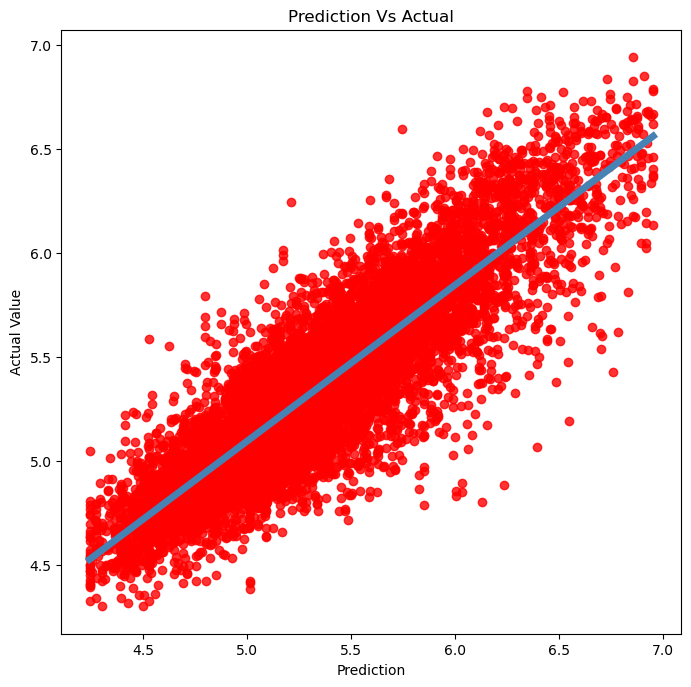

In [96]:
plt.figure(figsize=(8,8),dpi=100)
plt.title('Prediction Vs Actual')
sns.regplot(x=y_test,y=prediction,color='red',line_kws={'lw': 5, 'color': '#4682b4'})
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()